# Regression - Final Project

Bu projede www.zingat.com sitesinde yayımlanan ev kirası ilanlarını webscraping ile alarak, Regression algoritmaları ile ev kira fiyatlarını tahmin eden bir model geliştiriyoruz.

<img src="https://media-blog.zingat.com/uploads/2021/02/Zingat_logo.beyaz_.1.jpg" width="400">

### İlan Listesini Oluşturalım

In [232]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [12]:
# Site içerik vermeyi reddedince tarayıcıdan bağlanmaya çalışalım.
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
}

sehir="ankara"
# Önce zingat sayfasında arama yaparak ilan sayısını ve kaç sayfadan oluştuğunu belirledikten sonra
# Aşağıya bu ilanlardan kaç sayfa istediğimizi belirtiyoruz.
sayfa=22
# Her bir sayfadaki ilanların linklerinden ayrı bir liste oluşturalım
linkler=[]
for i in range(sayfa):
    url="https://www.zingat.com/"+sehir+"-kiralik?page="+str(i+1)
    response=requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    ul_liste = soup.find("ul", class_="zc-viewport")
    li_liste = ul_liste.find_all("li")
    
    for li in li_liste:
        link = li.find("a", class_="zl-card-inner")["href"]
        linkler.append(link)

In [13]:
# Kaç adet ilan elde ettik.
print(len(linkler))
linkler[:10]

443


['/demet-hastane-metro-yani-cogu-sektore-uygun-kiralik-200m2-dukkan-5037997i',
 '/ankara-cankaya-emekli-subay-evlerinde-kiralik-daire-5002604i',
 '/dora-park-sifir-sitede-yerden-isitmali-kiralik-genis-3-1-daire-5037957i',
 '/yenimahalle-metro-ve-sehir-hastanesi-yakini-1-1-kiralik-daire-5038030i',
 '/meva-sehir-de-3-1-esyali-en-az-3-aylik-kiralik-daire-5002892i',
 '/sincan-torekent-mah-3-1-2-kat-4979071i',
 '/incesuda-katta-bakimli-mantolamali-3-1-kiralik-daire-4846593i',
 '/kolej-metrosuna-5-dk-mesafede-acik-terasli-esyali-2-1-kiralik-4856296i',
 '/oz-inoks-tan-kolej-topraklik-mah-80-m2-wc-li-kose-basi-5038755i',
 '/oz-inoks-tan-kolej-topraklik-mah-40-m2-wc-li-kombili-5038757i']

### Her ilanın özelliklerini alalım

In [17]:
#İlan detay sayfasından gelecek tüm alanlar için boş bir DataFrame oluşturalım
df=pd.DataFrame()

for link in linkler:
    url="https://www.zingat.com" + link
    response=requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    # Her ilan için boş bir satır oluşturup içini dolduralım
    row={}
    row['Fiyat']=soup.find("strong", itemprop="price").get("content")
    poi_map_div = soup.find('div', id='poiMap')
    # Harita konumu varsa alalım
    if poi_map_div:
        row['Lon']=soup.find('div', id='poiMap')['data-lon']
        row['Lat']=soup.find('div', id='poiMap')['data-lat']
    # Liste halindeki detay bilgileri de alalım
    for li in soup.find("ul", class_="row attribute-detail-list").findAll('li', class_="col-md-6"):
        row[li.find('strong').text.strip()]= li.find('span').text.strip()
        #print(li.find('strong').text.strip(), li.find('span').text.strip())
    
    # İçini doldurduğumuz satırı data frame içerisine ekleyelim
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

In [19]:
#df.to_csv(sehir+".csv", index=False)

In [259]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [260]:
sehir="ankara"
df=pd.read_csv(sehir+".csv")

In [261]:
#df["Link"]=linkler

### EDA

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fiyat                      443 non-null    int64  
 1   Lon                        428 non-null    float64
 2   Lat                        428 non-null    float64
 3   İlan Tarihi                443 non-null    object 
 4   İlan no                    443 non-null    int64  
 5   m²                         141 non-null    object 
 6   Net m²                     387 non-null    object 
 7   Bölüm/Oda Sayısı           72 non-null     float64
 8   Isıtma Tipi                349 non-null    object 
 9   Bina Yaşı                  359 non-null    object 
 10  Kullanım Durumu            321 non-null    object 
 11  Aidat                      306 non-null    object 
 12  Depozito                   342 non-null    object 
 13  Kimden                     180 non-null    object 

In [263]:
# Değeri az ve gereksiz alanları veri setinden çıkaralım
df.columns

Index(['Fiyat', 'Lon', 'Lat', 'İlan Tarihi', 'İlan no', 'm²', 'Net m²',
       'Bölüm/Oda Sayısı', 'Isıtma Tipi', 'Bina Yaşı', 'Kullanım Durumu',
       'Aidat', 'Depozito', 'Kimden', 'Krediye Uygun', 'Brüt m²', 'Oda Sayısı',
       'Banyo Sayısı', 'Binadaki Kat Sayısı', 'Bulunduğu Kat',
       'Mobilya Durumu', 'Konut Şekli', 'Görüntülü Ev Gezintisi\n?',
       'Tapu Durumu', 'Yapının Durumu', 'Hayvan Dostu Patili Evler',
       'Kapasite', 'Devren', 'Dış Cephe', 'Otopark', 'Bahçe', 'Yapı Tipi',
       'Kapalı Alan', 'Zemin Etüdlü', 'Arsa Alanı', 'Tavan Yüksekliği',
       'Takasa Uygun', 'İmar Durumu', 'Parselli', 'Ada', 'Parsel'],
      dtype='object')

In [264]:
df.drop(['İlan Tarihi', 'İlan no', 'Görüntülü Ev Gezintisi\n?', 'Kapasite', 'Devren', 'Dış Cephe', 'Otopark', 'Bahçe', 'Yapı Tipi',
       'Kapalı Alan', 'Zemin Etüdlü', 'Arsa Alanı', 'Tavan Yüksekliği',
       'Takasa Uygun', 'İmar Durumu', 'Parselli', 'Ada', 'Parsel'], axis=1, inplace=True)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fiyat                      443 non-null    int64  
 1   Lon                        428 non-null    float64
 2   Lat                        428 non-null    float64
 3   m²                         141 non-null    object 
 4   Net m²                     387 non-null    object 
 5   Bölüm/Oda Sayısı           72 non-null     float64
 6   Isıtma Tipi                349 non-null    object 
 7   Bina Yaşı                  359 non-null    object 
 8   Kullanım Durumu            321 non-null    object 
 9   Aidat                      306 non-null    object 
 10  Depozito                   342 non-null    object 
 11  Kimden                     180 non-null    object 
 12  Krediye Uygun              443 non-null    object 
 13  Brüt m²                    302 non-null    object 

In [266]:
df["Fiyat"].value_counts()

Fiyat
15000     39
18000     21
20000     18
10000     17
11000     16
          ..
19900      1
475000     1
47500      1
25250      1
510000     1
Name: count, Length: 137, dtype: int64

<Axes: ylabel='Fiyat'>

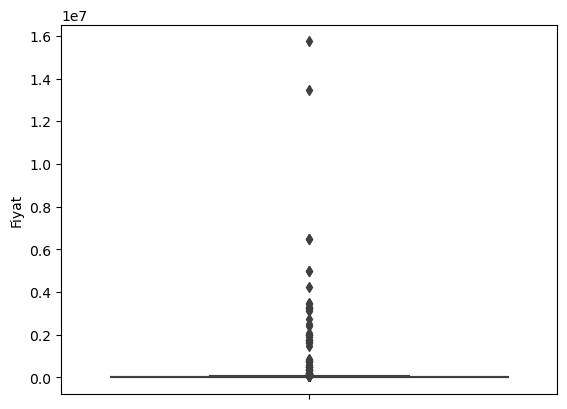

In [267]:
sns.boxplot(y=df["Fiyat"])

In [268]:
df=df[df["Fiyat"]<30000]

In [269]:
df["m²"].unique()

array([nan, '80m²', '40m²', '105m²', '160m²', '95m²', '130m²', '90m²',
       '55m²', '112m²', '110m²', '70m²', '78m²', '60m²', '250m²', '180m²',
       '28m²', '100m²', '45m²', '125m²', '230m²', '50m²', '350m²',
       '120m²', '240m²', '115m²', '175m²', '72m²', '155m²', '17m²',
       '30m²', '3070m²', '85m²', '1265m²', '140m²', '550m²'], dtype=object)

In [270]:
# Şimdilik boşlukları 0 ile doldurup sayıya çevirelim. Sonra tekrar boşaltalım.
df["m²"] = df["m²"].str.replace("m²", "").fillna(0).astype(int)
df["m²"] = df["m²"].replace(0, np.nan)

In [271]:
# Şimdilik boşlukları 0 ile doldurup sayıya çevirelim. Sonra tekrar boşaltalım.
df["Net m²"] = df["Net m²"].str.replace("-", "0").fillna(0).astype(int)
df["Net m²"] = df["Net m²"].replace(0, np.nan)

In [272]:
df["Brüt m²"].unique()
# Alan için Net m2 alanını kullanacağım için bu alan ihtiyaç yok gibi.

array(['110m²', '140m²', '55m²', '130m²', '95m²', nan, '200m²', '210m²',
       '135m²', '90m²', '120m²', '145m²', '60m²', '15000m²', '125m²',
       '155m²', '220m²', '65m²', '143m²', '175m²', '105m²', '131m²',
       '50m²', '180m²', '160m²', '80m²', '100m²', '123m²', '115m²',
       '240m²', '42m²', '45m²', '150m²', '75m²', '47m²', '85m²', '170m²',
       '52m²', '70m²', '185m²', '96m²', '67m²', '98m²', '230m²', '280m²',
       '158m²', '72m²', '162m²', '116m²', '102m²'], dtype=object)

In [273]:
df.corr(numeric_only=True)

,Fiyat,Lon,Lat,m²,Net m²,Bölüm/Oda Sayısı
Fiyat,1.000000,0.309041,0.215845,-0.161952,0.288055,0.208377
Lon,0.309041,1.000000,0.822839,0.075521,-0.106038,0.234998
Lat,0.215845,0.822839,1.000000,0.262649,-0.045966,0.236374
m²,-0.161952,0.075521,0.262649,1.000000,0.966398,0.330664
Net m²,0.288055,-0.106038,-0.045966,0.966398,1.000000,0.554372
Bölüm/Oda Sayısı,0.208377,0.234998,0.236374,0.330664,0.554372,1.000000


In [274]:
# Arada güçlü bir ilişki var. m2 ile Net m2 alanını lineer regression ile doldurabiliriz.
import pandas as pd
from sklearn.linear_model import LinearRegression

subset = df.dropna(subset=['m²', 'Net m²'])
X = subset['m²'].values.reshape(-1, 1)
y = subset['Net m²'].values
model = LinearRegression()
model.fit(X, y)
missing_data = df[df['Net m²'].isnull()]['m²'].values.reshape(-1, 1)
predict = model.predict(missing_data)
df.loc[df['Net m²'].isnull(), 'Net m²'] = predict

In [275]:
df.drop(['m²', 'Brüt m²'], axis=1, inplace=True)

In [276]:
df["Bölüm/Oda Sayısı"].unique()

array([nan,  1.,  2.,  3.,  4.])

In [277]:
df["Oda Sayısı"].unique()

array(['2+1', '3+1', '1+1', nan, '4+1', '5+1'], dtype=object)

In [278]:
df["Oda"] = df["Oda Sayısı"].str.split("+").apply(lambda x: eval("+".join(x)) if isinstance(x, list) else np.nan)

In [279]:
df["Oda"].value_counts()

Oda
4.0    143
3.0     46
2.0     34
5.0     18
6.0     13
Name: count, dtype: int64

In [280]:
df["Oda"].fillna(df["Bölüm/Oda Sayısı"], inplace=True)
df['Oda']=df['Oda'].fillna(df['Oda'].mode()[0])

In [281]:
df.drop(['Bölüm/Oda Sayısı', 'Oda Sayısı'], axis=1, inplace=True)

In [282]:
df["Isıtma Tipi"].unique()

array(['Kombi (Doğalgaz)', 'Yerden Isıtma', 'Merkezi Sistem',
       'Kombi (Elektrikli)', nan, 'Merkezi Sistem (Isı Payı Ölçer)',
       'Klima', 'Kalorifer (Doğalgaz)', 'Fancoil', 'Soba (Kömür)',
       'Soba (Doğalgaz)', 'Yok'], dtype=object)

In [283]:
df["Isıtma Tipi"].value_counts()

Isıtma Tipi
Kombi (Doğalgaz)                   178
Merkezi Sistem (Isı Payı Ölçer)     24
Merkezi Sistem                      22
Kombi (Elektrikli)                   6
Kalorifer (Doğalgaz)                 5
Klima                                3
Fancoil                              3
Yok                                  3
Yerden Isıtma                        2
Soba (Doğalgaz)                      2
Soba (Kömür)                         1
Name: count, dtype: int64

In [284]:
import pandas as pd

# 'Isıtma Tipi' sütununu gruplamak için bir haritalama sözlüğü oluşturun
gruplama_sozlugu = {
    'Kombi (Doğalgaz)': 'Doğalgaz',
    'Kombi (Elektrikli)': 'Elektrik',
    'Merkezi Sistem': 'Doğalgaz',
    'Merkezi Sistem (Isı Payı Ölçer)': 'Doğalgaz',
    'Yerden Isıtma': 'Doğalgaz',
    'Kalorifer (Doğalgaz)': 'Doğalgaz',
    'Klima': 'Elektrik',
    'Fancoil': 'Elektrik',
    'Soba (Kömür)': 'Kömür',
    'Soba (Doğalgaz)': 'Doğalgaz',
    'Yok': 'Elektrik'
}

df['Isıtma'] = df['Isıtma Tipi'].map(gruplama_sozlugu)

In [285]:
df['Isıtma'].value_counts()

Isıtma
Doğalgaz    233
Elektrik     15
Kömür         1
Name: count, dtype: int64

In [286]:
df['Isıtma']=df['Isıtma'].fillna(df['Isıtma'].mode()[0])

In [287]:
df.drop(['Isıtma Tipi'], axis=1, inplace=True)

In [288]:
df["Bina Yaşı"].unique()

array(['40 ve üzeri', '0', '26-30 arası', '16-20 arası', '36-40 arası',
       nan, '11-15 arası', '21-25 arası', '4', '6-10 arası', '1', '3',
       '2', '5', '31-35 arası'], dtype=object)

In [289]:
df['Bina Yaşı']=df['Bina Yaşı'].fillna(df['Bina Yaşı'].mode()[0])

In [290]:
df['Yaş'] = np.where(df['Bina Yaşı'] == '40 ve üzeri', 0, np.where(df['Bina Yaşı'].str.contains('-'), 2, 4))

In [291]:
df['Yaş'].value_counts()

Yaş
2    260
4     51
0     11
Name: count, dtype: int64

In [292]:
df.drop(['Bina Yaşı'], axis=1, inplace=True)

In [293]:
df['Aidat'].unique()

array(['0 TL (aylık)', '1.300 TL (aylık)', '450 TL (aylık)',
       '200 TL (aylık)', '50 TL (aylık)', nan, '100 TL (aylık)',
       '1.650 TL (aylık)', '1.800 TL (aylık)', '250 TL (aylık)',
       '500 TL (aylık)', '150 TL (aylık)', '1.200 TL (aylık)',
       '60 TL (aylık)', '70 TL (aylık)', '220 TL (aylık)',
       '350 TL (aylık)', '2.000 TL (aylık)', '600 TL (aylık)',
       '1 TL (aylık)', '650 TL (aylık)', '400 TL (aylık)',
       '20.000 TL (aylık)', '375 TL (aylık)', '550 TL (aylık)',
       '685 TL (aylık)', '11.700 TL (aylık)', '1.000 TL (aylık)',
       '300 TL (aylık)', '110 TL (aylık)', '1.500 TL (aylık)',
       '1.450 TL (aylık)', '80 TL (aylık)', '1.975 TL (aylık)',
       '980 TL (aylık)', '900 TL (aylık)', '715 TL (aylık)',
       '30 TL (aylık)', '225 TL (aylık)', '460 TL (aylık)',
       '750 TL (aylık)', '1.100 TL (aylık)', '1.250 TL (aylık)',
       '825 TL (aylık)', '35 TL (aylık)', '800 TL (aylık)',
       '1.150 TL (aylık)', '125 TL (aylık)', '1.280 TL (aylık)

In [294]:
df['Aidat']=df['Aidat'].fillna(df['Aidat'].mode()[0])

In [295]:
df["Aidat"] = df["Aidat"].str.replace(".", "").str.replace(" TL (aylık)", "").astype(int)

In [296]:
df['Depozito'].unique()

array(['0 TL undefined', '25.500 TL', '13.000 TL', '15.000 TL undefined',
       nan, '18.000 TL undefined', '11.000 TL', '7.500 TL', '15.000 TL',
       '14.000 TL', '18.000 TL', '50.000 TL', '11.000 TL undefined',
       '10.000 TL undefined', '22.500 TL', '19.500 TL', '10.000 TL',
       '19.000 TL', '44.000 TL', '16.250 TL undefined',
       '10.250 TL undefined', '11.500 TL', '46.000 TL',
       '13.500 TL undefined', '0 TL', '20.000 TL', '25.000 TL undefined',
       '10.250 TL', '40.000 TL', '30.000 TL', '14.500 TL', '13.500 TL',
       '35.000 TL', '36.000 TL undefined', '12.000 TL', '25.000 TL',
       '45.000 TL', '12.750 TL undefined', '36.000 TL', '17.000 TL',
       '3.000 TL', '6.500 TL', '8.500 TL', '17.000 TL undefined',
       '7.000 TL', '5.000 TL', '22.000 TL', '8.000 TL',
       '11.500 TL undefined', '25.500 TL undefined', '31.000 TL',
       '40.000 TL undefined', '16.000 TL', '50.000 TL undefined',
       '5.000 TL undefined', '16.500 TL', '15.500 TL', '4.000 TL'

In [297]:
df["Depozito"] = df["Depozito"].str.replace(" TL", "").str.replace(" undefined", "").str.replace(".", "")

In [298]:
df['Depozito']=df['Depozito'].fillna(df['Depozito'].mode()[0])

In [299]:
df['Depozito']=df['Depozito'].astype(int)

In [300]:
df["Kimden"].value_counts()

Kimden
Danışman              132
İnşaat Geliştirici      1
Name: count, dtype: int64

In [301]:
df["Kullanım Durumu"].value_counts()

Kullanım Durumu
Boş            246
Kiracılı         4
Mülk Sahibi      1
Name: count, dtype: int64

In [302]:
df["Tapu Durumu"].value_counts()

Tapu Durumu
Kat Mülkiyeti     71
Kat İrtifakı       5
İskanı Alınmış     5
Arsa Tapulu        2
Bilinmiyor         1
Hisseli Tapu       1
Name: count, dtype: int64

In [303]:
df.drop(['Kimden', 'Kullanım Durumu', 'Tapu Durumu', 'Hayvan Dostu Patili Evler'], axis=1, inplace=True)

In [304]:
df["Banyo Sayısı"].unique()

array(['1', '2', nan, '3', '0', '4', '6 ve üzeri'], dtype=object)

In [305]:
df['Banyo Sayısı']=df['Banyo Sayısı'].fillna(df['Banyo Sayısı'].mode()[0])

In [306]:
df["Banyo"] = np.where(df['Banyo Sayısı'] == '1', 0, np.where(df['Banyo Sayısı'] == '1', 2, 4))

In [307]:
df.drop(['Banyo Sayısı'], axis=1, inplace=True)

In [308]:
df['Mobilya Durumu'].unique()

array(['Eşyasız', 'Sadece Mutfak', 'Eşyalı (Mobilyalı)', nan,
       'Sadece Beyaz Eşya'], dtype=object)

In [309]:
df["Eşyalı"] = np.where(df['Mobilya Durumu'] == 'Eşyalı (Mobilyalı)', 1, 0)

In [310]:
df.drop(['Mobilya Durumu'], axis=1, inplace=True)

In [311]:
df["Konut Şekli"].value_counts()

Konut Şekli
Ara Kat           72
En Üst Kat        20
Giriş Kat         14
Çatı Dubleksi      4
Bahçe Dubleksi     2
Teras Katı         1
Dubleks            1
Ters Dubleks       1
Bahçe Katı         1
Name: count, dtype: int64

In [312]:
df['Konut Şekli']=df['Konut Şekli'].fillna(df['Konut Şekli'].mode()[0])

In [313]:
gruplama_sozlugu = {
    'Ara Kat': 'Ara Kat',
    'En Üst Kat': 'En Üst Kat',
    'Giriş Kat': 'En Alt Kat',
    'Çatı Dubleksi':'En Üst Kat',
    'Bahçe Dubleksi':'Ara Kat',
    'Teras Katı':'En Üst Kat',
    'Dubleks':'Ara Kat',
    'Ters Dubleks':'Ara Kat',
    'Bahçe Katı':'En Alt Kat'
}

# 'Gruplanmis Isitma Tipi' adında yeni bir sütun oluşturun
df['Kat Tipi'] = df['Konut Şekli'].map(gruplama_sozlugu)

In [314]:
df["Yapının Durumu"].value_counts()

Yapının Durumu
İkinci El    142
Sıfır         16
Name: count, dtype: int64

In [315]:
df["Yapının Durumu"]=df["Yapının Durumu"].str.replace('İkinci El', '0').str.replace("Sıfır", "1")

In [316]:
df["Yapının Durumu"]=df["Yapının Durumu"].fillna(0)

In [317]:
df["Binadaki Kat Sayısı"].value_counts()

Binadaki Kat Sayısı
3              91
4              56
5              39
10-20 arası    23
2              15
8              14
6               7
9               7
20 ve üzeri     6
7               5
10              4
1               1
Name: count, dtype: int64

In [318]:
df['Binadaki Kat Sayısı']=df['Binadaki Kat Sayısı'].fillna(df['Binadaki Kat Sayısı'].mode()[0])

In [319]:
df["Binadaki Kat Sayısı"] = df["Binadaki Kat Sayısı"].str.replace("10-20 arası", "15").str.replace("20 ve üzeri", "20").astype(int)

In [320]:
df["Bulunduğu Kat"].value_counts()

Bulunduğu Kat
3               53
2               42
1               31
Giriş Katı      29
4               18
Yüksek Giriş    18
5               10
6                9
Zemin Kat        6
En Üst Kat       4
Bahçe katı       4
7                4
8                4
9                3
11               3
Kot 1            3
13               2
15               2
Kot 2            2
20 ve üzeri      2
Teras Kat        1
Müstakil         1
14               1
10               1
12               1
Kot 3            1
Name: count, dtype: int64

In [321]:
df['Bulunduğu Kat']=df['Bulunduğu Kat'].fillna(df['Bulunduğu Kat'].mode()[0])

In [322]:
gruplama_sozlugu = {
    'Giriş Katı': '0',
    'Yüksek Giriş': '1',
    'Zemin Kat': '0',
    '20 ve üzeri':'20',
    'En Üst Kat':'10',
    'Bahçe katı':'0',
    'Kot 1':'-1',
    'Kot 2':'-2',
    'Kot 3':'-3',
    'Teras Kat':'10',
    'Müstakil':'0',
    'Komple':'1',
    'Bodrum Kat':0
}

df['Bulunduğu Kat'] = df['Bulunduğu Kat'].replace(gruplama_sozlugu)
#df['Bulunduğu Kat'] = df['Bulunduğu Kat'].map(gruplama_sozlugu, na_action='ignore')

In [323]:
df['Bulunduğu Kat'] = df['Bulunduğu Kat'].astype(int)

In [324]:
bos=df.isnull().sum()
bos[bos>0]

Lon    14
Lat    14
dtype: int64

In [325]:
df=df[df["Lon"].notnull()]

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 1 to 440
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fiyat                308 non-null    int64  
 1   Lon                  308 non-null    float64
 2   Lat                  308 non-null    float64
 3   Net m²               308 non-null    float64
 4   Aidat                308 non-null    int32  
 5   Depozito             308 non-null    int32  
 6   Krediye Uygun        308 non-null    object 
 7   Binadaki Kat Sayısı  308 non-null    int32  
 8   Bulunduğu Kat        308 non-null    int32  
 9   Konut Şekli          308 non-null    object 
 10  Yapının Durumu       308 non-null    object 
 11  Oda                  308 non-null    float64
 12  Isıtma               308 non-null    object 
 13  Yaş                  308 non-null    int32  
 14  Banyo                308 non-null    int32  
 15  Eşyalı               308 non-null    int32  


In [327]:
df.head()

,Fiyat,Lon,Lat,Net m²,Aidat,Depozito,Krediye Uygun,Binadaki Kat Sayısı,Bulunduğu Kat,Konut Şekli,Yapının Durumu,Oda,Isıtma,Yaş,Banyo,Eşyalı,Kat Tipi
1,21000,32.841352,39.920196,90.0,0,0,Hayır,5,2,Ara Kat,0,3.0,Doğalgaz,0,0,0,Ara Kat
2,25500,32.628697,39.935342,130.0,1300,25500,Hayır,8,6,Ara Kat,0,4.0,Doğalgaz,4,4,0,Ara Kat
3,13000,32.802641,39.961014,50.0,450,13000,Hayır,6,3,Ara Kat,0,2.0,Doğalgaz,2,0,0,Ara Kat
5,15000,32.560561,39.990767,120.0,200,15000,Hayır,15,2,Ara Kat,0,4.0,Doğalgaz,2,0,0,Ara Kat
6,13000,32.879288,39.912581,120.0,50,0,Hayır,3,3,Ara Kat,0,4.0,Doğalgaz,2,0,0,Ara Kat


In [328]:
df["Lon"]=df["Lon"]-32
df["Lat"]=df["Lat"]-39

In [329]:
df["Krediye Uygun"].value_counts()

Krediye Uygun
Hayır    308
Name: count, dtype: int64

In [330]:
df.drop('Krediye Uygun', axis=1, inplace=True)

## Modelleme

In [331]:
y=df[["Fiyat"]]
x=df.drop(['Fiyat'], axis=1)
x.shape, y.shape

((308, 15), (308, 1))

In [332]:
x = pd.get_dummies(x, drop_first = True)
x.head()

,Lon,Lat,Net m²,Aidat,Depozito,Binadaki Kat Sayısı,Bulunduğu Kat,Oda,Yaş,Banyo,Eşyalı,Konut Şekli_Bahçe Dubleksi,Konut Şekli_Bahçe Katı,Konut Şekli_Dubleks,Konut Şekli_En Üst Kat,Konut Şekli_Giriş Kat,Konut Şekli_Teras Katı,Konut Şekli_Ters Dubleks,Konut Şekli_Çatı Dubleksi,Yapının Durumu_0,Yapının Durumu_1,Isıtma_Elektrik,Isıtma_Kömür,Kat Tipi_En Alt Kat,Kat Tipi_En Üst Kat
1,0.841352,0.920196,90.0,0,0,5,2,3.0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.628697,0.935342,130.0,1300,25500,8,6,4.0,4,4,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.802641,0.961014,50.0,450,13000,6,3,2.0,2,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,0.560561,0.990767,120.0,200,15000,15,2,4.0,2,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,0.879288,0.912581,120.0,50,0,3,3,4.0,2,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        rf=RandomForestRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,rf]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting',
                    'K Neighbors Regressor','Decision Tree','XGB Regressor',"Random Forest Regressor"]
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=23)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [334]:
algo_test(x,y)

,R_Squared,RMSE,MAE
K Neighbors Regressor,0.814722,2449.896311,1652.419355
Gradient Boosting,0.771696,2719.521909,2179.325830
XGB Regressor,0.771489,2720.758707,2058.649131
Random Forest Regressor,0.763022,2770.704414,2211.000000
Extra Tree,0.565581,3751.376092,2396.774194
Ridge,0.397240,4418.842597,3650.559972
Linear,0.389096,4448.592503,3649.800603
Lasso,0.386929,4456.476318,3660.842828
ElasticNet,0.348763,4593.098314,3864.568703
Decision Tree,0.311357,4723.166994,3245.161290


#### Feature Importance
* Normalde Linear Regression ile yapıyorduk. Ancak bu modelin başarısı düşük
* Başarılı modellerden biri olan Random Forest Regressor ile yapalım

In [335]:
rf=RandomForestRegressor()

In [336]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=23)

In [337]:
model=rf.fit(x_train, y_train)

In [338]:
tahmin = model.predict(x_test)

In [339]:
r2_score(y_test, tahmin)

0.7617018507315931

In [340]:
mean_squared_error(y_test, tahmin) ** .5

2778.411635762767

In [341]:
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Coefs': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Coefs', ascending=False)

In [342]:
feature_importance

,Feature,Coefs
4,Depozito,0.371010
0,Lon,0.161847
1,Lat,0.152710
2,Net m²,0.145926
9,Banyo,0.046871
6,Bulunduğu Kat,0.026248
7,Oda,0.025669
5,Binadaki Kat Sayısı,0.021811
3,Aidat,0.017322
19,Yapının Durumu_0,0.008658


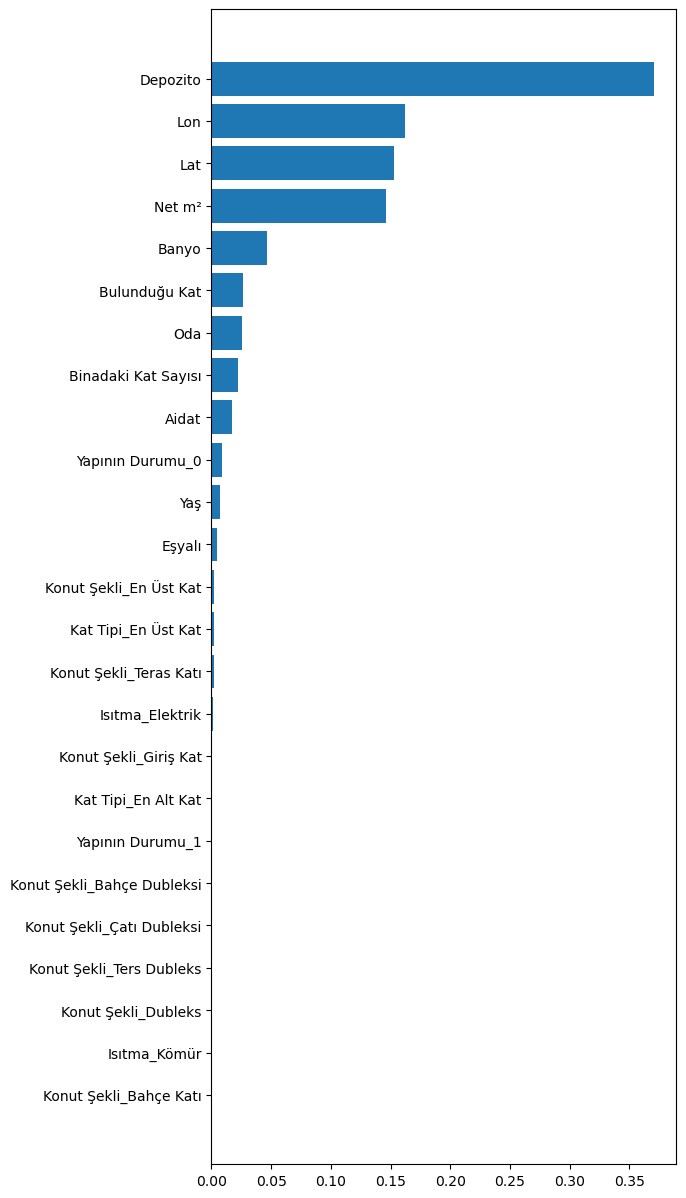

In [343]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,15))
plt.barh(feature_importance["Feature"], feature_importance["Coefs"]);
plt.gca().invert_yaxis()

In [344]:
residuals=y_test["Fiyat"]-tahmin
residuals

267    1247.5
264   -2124.5
217     160.0
318    5320.5
396     -87.5
        ...  
268    -740.0
414    2150.0
26     3283.0
106    1655.0
299    1551.5
Name: Fiyat, Length: 62, dtype: float64

In [345]:
y_test.shape, tahmin.shape

((62, 1), (62,))

In [346]:
[y_test]

[     Fiyat
 267  13000
 264  16500
 217  16300
 318  26000
 396  12000
 ..     ...
 268  10250
 414  26000
 26   22500
 106  15900
 299  18000
 
 [62 rows x 1 columns]]

## Sonuç

Bu projede Zingat üzerinden `web kazıma` yöntemi ile elde edilen veriler üzerinde regression modeli geliştirildi. Başarı biraz düşük oldu ama veri sayısı daha fazla olsaydı başarı yüksek çıkabilirdi.